In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
norm = 5
run = [1192434,1192473] # one warm, one cold run

# paths
path='/UserData/maddalena/sacla2022/05-processed_I/'

In [3]:
# load Iq data 
file =np.load(f'{path}water_{run[1]}.npz')
q = file['q'][6:-2] # here I crop the low q's and very high q's cause they need masking
Iq =file['I'][6:-2]


In [4]:
# load form factor and Compton scattering (for H2O)
data = np.loadtxt('../examples/form_factor.txt', skiprows=9)
q_temp  = data[:,0] # q values 
CS_temp = data[:,3] # compton scattering
FF_temp = data[:,4] # molecular form factor

# interpolate data to the experimental q array
CS = np.interp(q, q_temp, CS_temp)
FF = np.interp(q, q_temp, FF_temp)

# note that this is for pure water, need to be updated 

In [5]:
def calculate_Sq(q, Iq, CS, FF, norm_=5):
    '''
    Calculates the Structure factor for a given I(q)
    from [Kim et al., Science 358, 1589–1593 (2017), SI: page 7]
    note that this is for pure water
    need to be updated for aqueous solutions 
    
    Iq: angularly intergrated intensity
    CS: compton scattering
    FF: molecular form factor
    norm: normalisation parameter (need to think how to convert I(q) to electron units)
    '''

    # structure factor 
    Sq = (Iq/norm_ - CS)/FF 
    
    return Sq

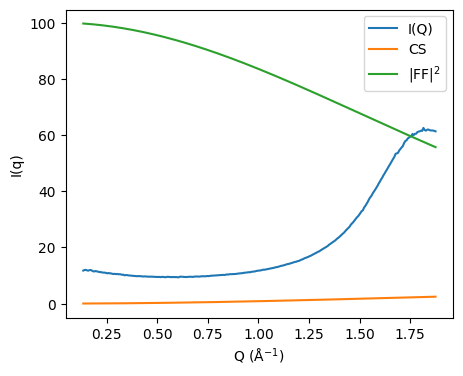

In [6]:
# plot
plt.figure(figsize=[5,4])
plt.plot(q,Iq/norm,label = 'I(Q)')
plt.plot(q,CS,label = 'CS')
plt.plot(q,FF, label = r'|FF|$^2$') 
plt.xlabel(r'Q ($\rm \AA ^{-1}$) ')
plt.ylabel('I(q)')
#plt.xlim(0,2)
plt.legend()
plt.show()

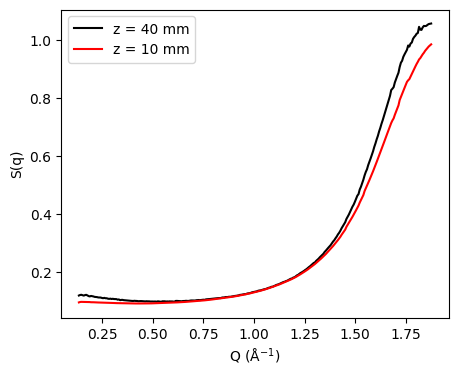

In [12]:
Sq = calculate_Sq(q, Iq, CS, FF, norm)

file =np.load(f'{path}water_{run[0]}.npz')
Iq2 =file['I'][6:-2]
Sq2 = calculate_Sq(q, Iq2, CS, FF, norm_=5.5)


plt.figure(figsize=[5,4])
plt.plot(q,Sq,c='black', label ='z = 40 mm')
plt.plot(q,Sq2,c='red', label ='z = 10 mm')
plt.ylabel('S(q)')
plt.xlabel(r'Q ($\rm \AA ^{-1}$) ')
plt.legend()
plt.show()